## Observations and Insights 

## Executive Summary

In this report you notice this following.

- The study was conducted statically 50/50 male vs female.
- Capomulin and Ramicane appear to be most effective at minimizing tumors
- Mouse b128 appear to have growth after around 35 days.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_studyDF = mouse_metadata.merge(study_results)

# Display the data table for preview
mouse_studyDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Summarize Details about to files
uni_mouse = mouse_metadata['Mouse ID'].nunique() # Number of Unique Mice 
records = len(study_results) # Number of records in study
mice_count = study_results['Mouse ID'].nunique()  # Mice in Studay

# Output
print(f"Number of mice in master file: \033[1m{uni_mouse:,.0f}\033[0m")
print(f"Study Results contains \033[1m{records:,.0f}\033[0m records for \033[1m{mice_count:,.0f}\033[0m mice.")

Number of mice in master file: 249
Study Results contains 1,893 records for 249 mice.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_studyDF = mouse_studyDF[mouse_studyDF.duplicated()] 
dup_mouse = dup_mouse_studyDF['Mouse ID'].tolist()
print(len(dup_mouse), "duplicate Mouse IDs found:", *dup_mouse)

1 duplicate Mouse IDs found: g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_studyDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_studyDF = mouse_studyDF.drop_duplicates()
clean_mouse_studyDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
count_in_clean = clean_mouse_studyDF['Mouse ID'].nunique()
print(f"Count of mice in Cleaned Study: {count_in_clean}")



Count of mice in Cleaned Study: 249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimenDF = clean_mouse_studyDF.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

rmean = regimenDF['Tumor Volume (mm3)'].mean()
rmed = regimenDF['Tumor Volume (mm3)'].median()
rvar = regimenDF['Tumor Volume (mm3)'].var()
rstd = regimenDF['Tumor Volume (mm3)'].std()
rsem = regimenDF['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
reg_summary = pd.DataFrame({'Mean': rmean, 'Median': rmed, 'Variance': 
                                rvar, 'Standard Deviation': rstd, 'SEM': rsem })

reg_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
regimenDF['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,160.0,52.368318,6.502160,45.000000,47.107256,50.909965,56.259803,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimenDF['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

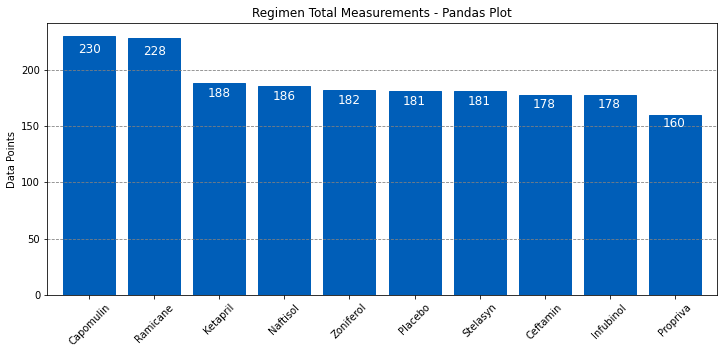

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regdf = clean_mouse_studyDF['Drug Regimen'].value_counts() #Series count
ax = regdf.plot(kind='bar', figsize=(12,5), width=0.8)
ax.set_ylabel('Data Points')
ax.set_title("Regimen Total Measurements - Pandas Plot")
ax.tick_params(axis='x', labelrotation = 45)
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    label_x = rect.get_x() + width / 2  # Center on width
    label_y = rect.get_y() + height * .95 # Just below the top -> 95%
    rect.set_color('#005EB8')
    # The height of the bar is the data value and can be used as the label
    label_text = height  # can format later 

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12).set_color('white')
        
ax.grid('on', which='major', axis='y',linestyle='--', color='grey', ) # Because I like good looking charts!



In [12]:
clean_mouse_studyDF['Drug Regimen'].value_counts()

x = np.arange(len(regdf))  # the label locations
print(x)

axis = regdf.index.tolist()
print(axis)

[0 1 2 3 4 5 6 7 8 9]
['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']


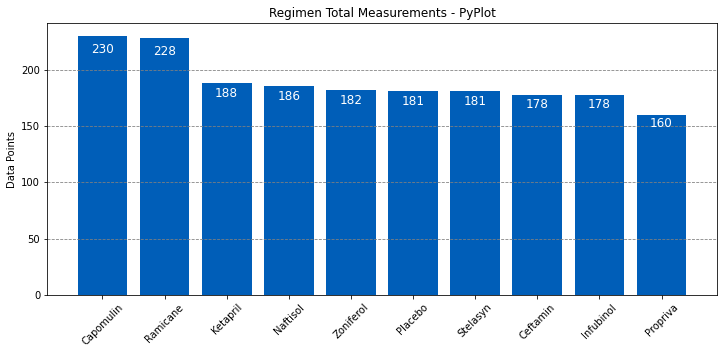

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regdf = clean_mouse_studyDF['Drug Regimen'].value_counts() # DataFrame
yvals = regdf.tolist() # Values
xlabels = regdf.index.tolist()
xpos = np.arange(len(regdf))  # the label locations

fig, ax = plt.subplots(figsize=(12,5))

#ax.bar(xpos, regdf, data=regdf, color='#005EB8', tick_label=xlabels) 
ax.bar(xlabels, yvals, color='#005EB8') 
ax.set_ylabel('Data Points')
ax.set_title("Regimen Total Measurements - PyPlot")
ax.tick_params(axis='x', labelrotation = 45)

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    label_x = rect.get_x() + width / 2  # Center on width
    label_y = rect.get_y() + height * .95 # Just below the top -> 95%
    #rect.set_color(')
    # The height of the bar is the data value and can be used as the label
    label_text = height  # can format later 

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12).set_color('white')
        
ax.grid('on', which='major', axis='y',linestyle='--', color='grey', ) # Because I like good looking charts!


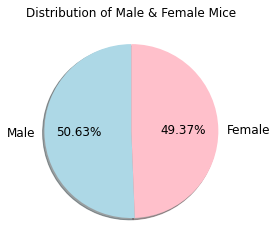

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pieDF = clean_mouse_studyDF['Sex'].value_counts()

piedfplot = pieDF.plot(kind='pie', ylabel='', title='Distribution of Male & Female Mice', 
                      startangle=90, autopct="%.2f%%", colors=['lightblue','pink'], shadow=True,
                     fontsize=12)
piedfplot.figure.savefig("./pymaceuticals_pie1_plot.png")

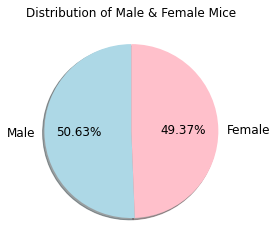

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#pieDF
labels=pieDF.index.values
plt.pie(pieDF, startangle=90, autopct="%.2f%%", 
        colors=['lightblue','pink'], labels=labels, shadow=True, textprops={'size': 12})
plt.title('Distribution of Male & Female Mice')
plt.savefig("./pymaceuticals_pie2_plot.png")

plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

searchlist = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

filterDF = clean_mouse_studyDF[clean_mouse_studyDF['Drug Regimen'].isin(searchlist)]
filterDF = filterDF.sort_values(['Timepoint'],ascending=True)

filterDF2 = filterDF[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

filterDF = filterDF.groupby(['Drug Regimen','Mouse ID'])["Tumor Volume (mm3)"].last()

#s = groupDF['Timepoint']  # Search on Timepoint

#smin = s.idxmin()
#print(f"The lowest number: {smin}")
#smax = s.idxmax()
#print(f"The highest number: {smax}")

#first = filterDF[s==s.min()]
#last = filterDF[s==s.max()]
#both = pd.concat([first,last])


#last
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
filterDF

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [17]:
#groupDF.head()

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentdict = {"Capomulin":[], "Ramicane":[], "Infubinol":[],"Ceftamin":[]}

for t in treatmentdict.keys():
    # Create empty list to fill with tumor vol data (for plotting)
    treatmentdata = filterDF2[filterDF2["Drug Regimen"]== t]['Tumor Volume (mm3)']
    treatmentdict[t].append(treatmentdata)
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatmentdata.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{t} potential outliers :  below {lower_bound}  & above {upper_bound}")


Capomulin potential outliers :  below 26.714832162499995  & above 55.9711007025
Ramicane potential outliers :  below 24.18658646249998  & above 57.48804812250001
Infubinol potential outliers :  below 32.309217298749985  & above 72.31757996875001
Ceftamin potential outliers :  below 32.818911426250004  & above 71.19095325625


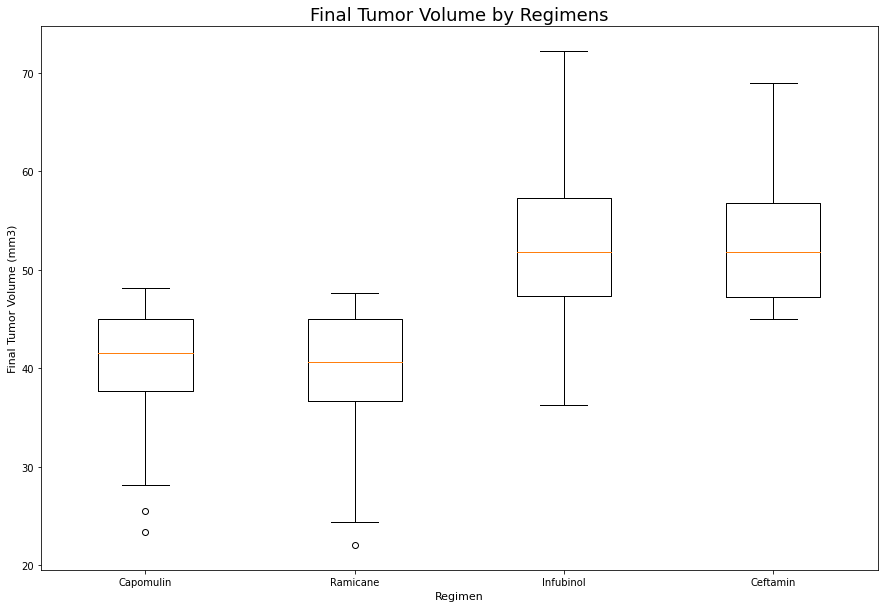

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels, data = treatmentdict.keys(), treatmentdict.values()

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Final Tumor Volume by Regimens',fontsize = 18)
ax.set_xlabel('Regimen',fontsize = 11)
ax.set_ylabel('Final Tumor Volume (mm3)',fontsize = 11)

ax.boxplot([n for v in treatmentdict.values() for n in v], labels=labels)

plt.savefig("./pymaceuticals_box_plot.png")

plt.show()

#fig, ax = plt.subplots()
#plt.title("Tumor Volume by Regimen")
#plt.xlabel('Regimen')
#plt.ylabel('Tumor Volume')
#plt.boxplot(tumvol, filterDF2.index.tolist())
#groupDF.boxplot()

## Line and Scatter Plots

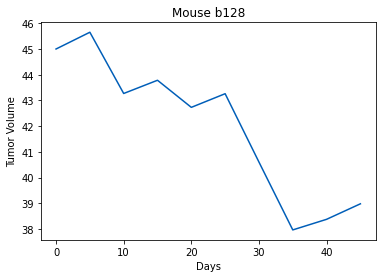

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = 'b128'
lineplotdf = clean_mouse_studyDF[clean_mouse_studyDF['Mouse ID']==mouse]
x_axis = lineplotdf['Timepoint']
y_axis = lineplotdf['Tumor Volume (mm3)']

fig, ax = plt.subplots()
plt.title(f"Mouse {mouse}")
plt.xlabel('Days')
plt.ylabel('Tumor Volume')
plt.plot(x_axis, y_axis, color='#005EB8')
plt.savefig("./pymaceuticals_line_plot.png")


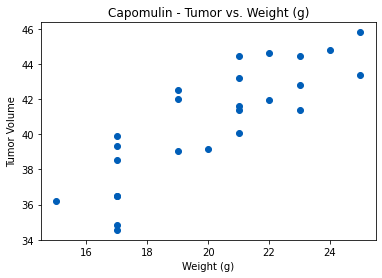

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capregDF = clean_mouse_studyDF[clean_mouse_studyDF['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean()

x_axis = capregDF['Weight (g)']
y_axis = capregDF['Tumor Volume (mm3)']

fig, ax = plt.subplots()
plt.title(f"Capomulin - Tumor vs. Weight (g)")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
plt.scatter(x_axis, y_axis, color='#005EB8')
plt.show()
plt.savefig("./pymaceuticals_scatter_plot.png")


## Correlation and Regression

The correlation between both factors is 0.44


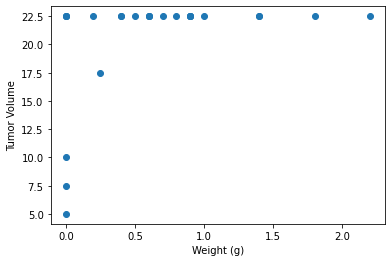

<Figure size 432x288 with 0 Axes>

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capregDF = clean_mouse_studyDF[clean_mouse_studyDF['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean()
weight = capregDF.iloc[:,2]
volume = capregDF.iloc[:,4]

correlation = st.pearsonr(volume, weight)
plt.scatter(volume, weight)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()
plt.savefig("./pymaceuticals_scatter2_plot.png")
